## Import TensorFlow and other libraries

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

Found 14 files belonging to 7 classes.
Using 12 files for validation.


['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,144 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

Validation batch shape: (12, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction results for the first elements
            CDM            HT          MDMV          NCLB          SCLB  \
0  9.067779e-14  2.790529e-12  2.282736e-14  9.632395e-09  9.999996e-01   
1  9.067779e-14  2.790529e-12  2.282736e-14  9.632395e-09  9.999996e-01   
2  9.005301e-14  5.794038e-09  3.075652e-17  5.860992e-06  3.754825e-08   
3  1.603786e-12  3.053730e-06  2.061207e-14  9.999938e-01  1.839656e-08   
4  3.782187e-17  1.000000e+00  7.783462e-24  4.159134e-10  3.106087e-19   

           SCMV            SR  
0  3.363660e-07  1.603915e-08  
1  3.363660e-07  1.603915e-08  
2  5.969064e-12  9.999942e-01  
3  9.681979e-07  2.072268e-06  
4  9.469066e-18  2.333599e-23  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
True vs Predicted Labels for all elements:
  True Label Predicted Label  Prediction Confidence
0       SCLB            SCLB               1.000000
1       SCLB            SCLB               1.00000

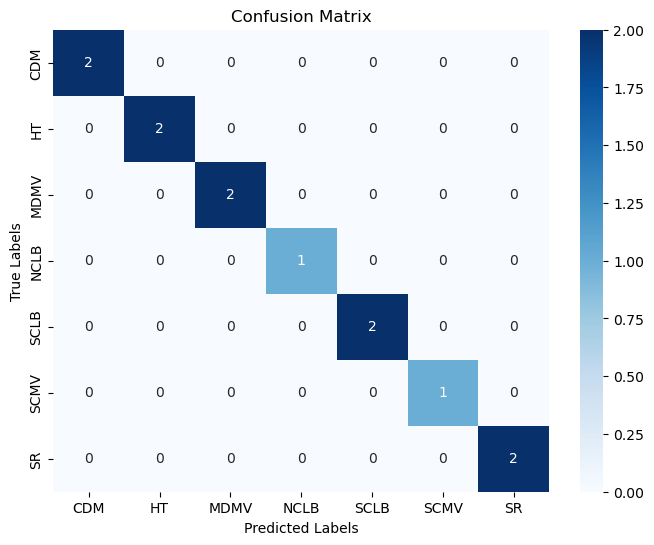

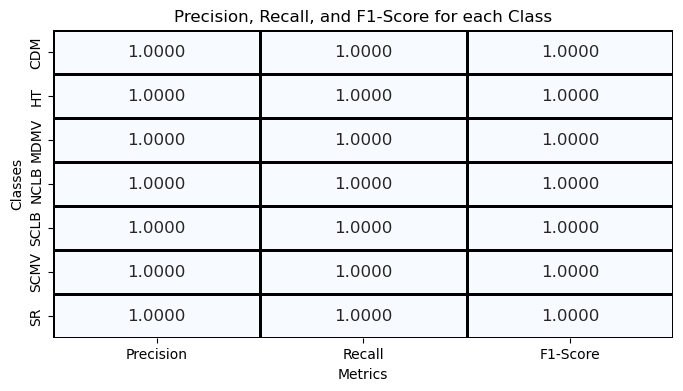

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#----------------------------------------------------------------------------------------------------------------
batch_size = 32
img_height = 224
img_width = 224
#----------------------------------------------------------------------------------------------------------------
data_dir = "D:/CNN-With/data/"
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
#----------------------------------------------------------------------------------------------------------------
class_names = val_ds.class_names
print(class_names)
#----------------------------------------------------------------------------------------------------------------
AUTOTUNE = tf.data.AUTOTUNE
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#----------------------------------------------------------------------------------------------------------------
# Define the path where the model is saved (in H5 format)
saved_model_path = "D:/CNN-With/Trained_Model_Cnn/model.h5"
# Load the model using tf.keras.models.load_model()
model = tf.keras.models.load_model(saved_model_path)
# Print the model summary to verify it's loaded correctly
model.summary()
#----------------------------------------------------------------------------------------------------------------
val_image_batch, val_label_batch = next(iter(val_ds))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)
# Assuming model and class_names are already defined
# Get the predictions from the model
tf_model_predictions = model.predict(val_image_batch)
# If the model has logits as output (from_logits=True in loss), apply softmax to get probabilities
if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
    tf_model_predictions = tf.nn.softmax(tf_model_predictions).numpy()
# Convert predictions to a DataFrame
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
# Set the DataFrame columns to class names
tf_pred_dataframe.columns = class_names
# Print the first few predictions to check
print("Prediction results for the first elements")
print(tf_pred_dataframe.head())
#----------------------------------------------------------------------------------------------------------------
# Assuming class_names and val_ds are already defined
# Initialize lists to store true labels and predictions
all_true_labels = []
all_predicted_classes_thresholded = []
all_pred_confidences = []
# Loop through the entire validation dataset
for images, labels in val_ds:
    # Get the true labels for this batch
    all_true_labels.extend(labels.numpy())  # Store true labels
    # Get the predictions from the model for this batch
    tf_model_predictions = model.predict(images)
    # If the model has logits as output (from_logits=True in loss), apply softmax to get probabilities
    if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
        tf_model_predictions = tf.nn.softmax(tf_model_predictions).numpy()
    # Convert predictions to a DataFrame
    tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
    # Set the DataFrame columns to class names
    tf_pred_dataframe.columns = class_names
    # Apply thresholding to make predictions more confident
    threshold = 0.5  # You can change this value
    predicted_classes_thresholded = tf_pred_dataframe.apply(
        lambda x: x.idxmax() if x.max() >= threshold else 'Uncertain', axis=1
    )
    # Store the predicted classes and prediction confidences
    all_predicted_classes_thresholded.extend(predicted_classes_thresholded)
    all_pred_confidences.extend(tf_pred_dataframe.max(axis=1))
# Convert true labels to class names
true_labels_class = [class_names[label] for label in all_true_labels]
# Create a DataFrame to show both true and predicted labels for the entire dataset
comparison_df = pd.DataFrame({
    'True Label': true_labels_class,
    'Predicted Label': all_predicted_classes_thresholded,
    'Prediction Confidence': all_pred_confidences
})
# Print the first few rows of the comparison
print("True vs Predicted Labels for all elements:")
print(comparison_df.head())
# Optionally, you can save this DataFrame to a CSV to examine it later
# comparison_df.to_csv("predictions_vs_true_labels.csv", index=False)
#----------------------------------------------------------------------------------------------------------------
# Assuming class_names, true_labels_class, and all_predicted_classes_thresholded are already defined
# Calculate the confusion matrix
cm = confusion_matrix(true_labels_class, all_predicted_classes_thresholded, labels=class_names)
# Convert confusion matrix to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
# Calculate Precision and Recall for each class
precision = precision_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)
recall = recall_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)
# Calculate F1-Score for each class
f1 = f1_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)
# Create a DataFrame to show precision, recall, and f1-score
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=class_names)
# Print confusion matrix and metrics
print("Confusion Matrix:\n")
print(cm_df)
print("\nPrecision, Recall, and F1-Score for each class:\n")
print(metrics_df)
# Optionally, calculate average precision, recall, and F1-Score
average_precision = precision_score(true_labels_class, all_predicted_classes_thresholded, average='macro')
average_recall = recall_score(true_labels_class, all_predicted_classes_thresholded, average='macro')
average_f1 = f1_score(true_labels_class, all_predicted_classes_thresholded, average='macro')
# Calculate mean and standard deviation for Precision, Recall, and F1-Score
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)
std_precision = np.std(precision)
std_recall = np.std(recall)
std_f1 = np.std(f1)
# Print the averages, means, and standard deviations
print(f"\nAverage Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")
print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")
print(f"\nStandard Deviation of Precision: {std_precision:.4f}")
print(f"Standard Deviation of Recall: {std_recall:.4f}")
print(f"Standard Deviation of F1-Score: {std_f1:.4f}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Plotting the metrics table as a heatmap (similar to confusion matrix)
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
# Use seaborn heatmap to display the metrics table as a styled heatmap
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='Blues', cbar=False, annot_kws={"size": 12}, 
            xticklabels=metrics_df.columns, yticklabels=metrics_df.index, linewidths=1, linecolor='black')
# Customize the table appearance
plt.title("Precision, Recall, and F1-Score for each Class")
plt.xlabel('Metrics')
plt.ylabel('Classes')
# Show the plot
plt.show()